# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [19]:
# Your code here:
fifa['valueNumeric']=fifa.Value.apply(lambda x: float(''.join(c for c in x if (c.isdigit() or c =='.'))))
fifa.head(1)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,valueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [37]:
# Your code here:
import statsmodels

from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols




In [45]:
fifa.Position.value_counts()
#fifa['Preferred Foot'].value_counts()
fifa.Position.dropna()
fifa['Preferred Foot'].dropna()
formula="fifa.valueNumeric ~ C(fifa['Position']) + C(fifa['Preferred Foot'])"
model = ols(formula, data=fifa.valueNumeric).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(fifa['Position']),8.767522e+06,26.0,4.031426,2.192419e-11
C(fifa['Preferred Foot']),7.292211e+04,1.0,0.871795,3.504713e-01
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

# Your conclusions here:
No se puede descartar la relacion entre lo que vale un jugador y su pie dominante, pero si se puede descartar la relación entre lo que vale y su posición.


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [46]:
# Your code here:

formula="fifa.valueNumeric ~ C(fifa['Nationality'])"
model = ols(formula, data=fifa.valueNumeric).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(fifa['Nationality']),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [57]:
# Your code here:

fifa=fifa.dropna()
fifa=fifa.reset_index()
#fifa=fifa.drop('index',axis=1)
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,valueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,...,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,60.0
17914,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,...,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,60.0
17915,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,...,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,60.0
17916,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,...,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,60.0


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [58]:
# Your code here:
from scipy.stats import linregress
lr=linregress(fifa.SprintSpeed,fifa.Stamina)
lr

LinregressResult(slope=0.6712352681864708, intercept=19.76319637897847, rvalue=0.6194215111682528, pvalue=0.0, stderr=0.006355797143908939)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f

In [66]:
# Your conclusions here:
R2=lr[2]**2
R2

0.383683008497962

In [67]:
x=sm.add_constant(fifa.SprintSpeed)
y=fifa.Stamina
modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)
modelo.summary()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Stamina   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:07:10   Log-Likelihood:                -70647.
No. Observations:               17918   AIC:                         1.413e+05
Df Residuals:                   17916   BIC:                         1.413e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.7632      0.422     46.857      0.000      18.936      20.590
SprintSpeed     0.6712      0.006    105.610      0.000       0.659       0.684
==============================================================================
Omnibus:                       24.424   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.491
Skew:                          -0.090   Prob(JB):                     4.81e-06
Kurtosis:                       3.008   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

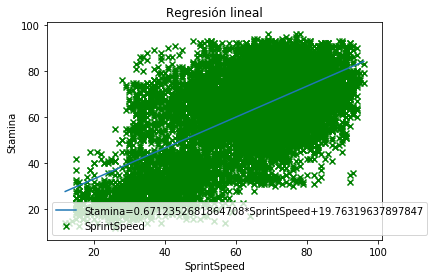

In [64]:
# plot
import matplotlib.pyplot as plt
x=np.linspace(fifa.SprintSpeed.min(), fifa.SprintSpeed.max(), 50)
y=lr[1]+lr[0]*x
plt.plot(x, y, label='Stamina={}*SprintSpeed+{}'.format(lr[0], lr[1]))
plt.scatter(fifa.SprintSpeed, fifa.Stamina, marker='x', c='g', label='SprintSpeed')
plt.title('Regresión lineal')
plt.xlabel('SprintSpeed')
plt.ylabel('Stamina')
plt.legend()
plt.show();

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [70]:
# Your code here:
from scipy.stats import linregress
lr=linregress(fifa.valueNumeric,fifa.Potential)
lr

LinregressResult(slope=-0.004991912485256222, intercept=72.66892449030965, rvalue=-0.2357388990820483, pvalue=9.154945284994248e-225, stderr=0.0001537444410029823)

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [71]:
# Your conclusions here:
x=sm.add_constant(fifa.valueNumeric)
y=fifa.Potential
modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Potential   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          9.15e-225
Time:                        15:10:58   Log-Likelihood:                -57442.
No. Observations:               17918   AIC:                         1.149e+05
Df Residuals:                   17916   BIC:                         1.149e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           72.6689      0.061   1195.957      0.000      72.550      72.788
valueNumeric    -0.0050      0.000    -32.469      0.000      -0.005      -0.005
==============================================================================
Omnibus:                       26.322   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.397
Skew:                           0.035   Prob(JB):                     2.51e-07
Kurtosis:                       3.189   Cond. No.                         538.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

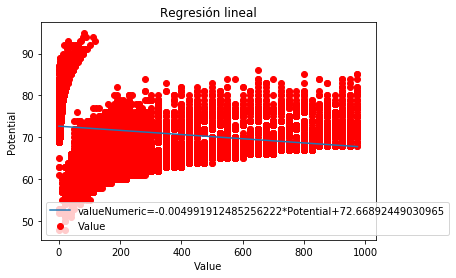

In [72]:
# Your code here:

x=np.linspace(fifa.valueNumeric.min(), fifa.valueNumeric.max(), 50)
y=lr[1]+lr[0]*x
plt.plot(x, y, label='valueNumeric={}*Potential+{}'.format(lr[0], lr[1]))
plt.scatter(fifa.valueNumeric, fifa.Potential, marker='o', c='r', label='Value')
plt.title('Regresión lineal')
plt.xlabel('Value')
plt.ylabel('Potential')
plt.legend()
plt.show();

Existen outlayers que afectan la regresion y la relación de la parte baja se parece más a una función cuadrática